In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
pd.options.mode.chained_assignment = None  # default='warn' i.e. statement to remove the warning.
pd.options.display.max_rows=100
pd.options.display.max_columns=75

In [3]:
# Read the Dataset

original_data=pd.read_table('C:/Users/ABHAYA/Documents/python/Python Project - Bank Lending/XYZCorp_LendingData.txt',
                            low_memory=False)

In [4]:
original_data.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2       NaN  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status   issue_d pymnt_plan  \
0     24000.0            Verified  Dec-2011          n   
1     30000.0     Source Verified  Dec-2011          n   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0         Jan-1985             1.0   
1    309xx         GA   1.00          0.0         Apr-1999             5.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0    13648.0        83.7        9.0                   f        0.0   
1     1687.0         9.4        4.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Jan-2015           171.62          NaN           Jan-2016   
1     Apr-2013           119.66          NaN           Sep-2013   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN          1.0   
1                         0.0                          NaN          1.0   

  application_type  annual_inc_joint  dti_joint verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                       NaN   
1       INDIVIDUAL               NaN        NaN                       NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   
1             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  default_ind  
0          NaN           NaN            0  
1          NaN           NaN            1

In [5]:
original_data.shape

(855969, 73)

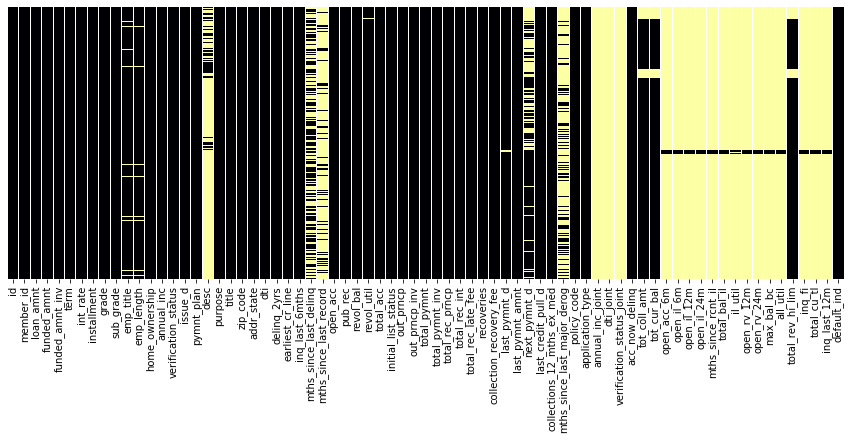

In [6]:
plt.figure(figsize=(15,5))
sns.heatmap(original_data.isnull(), cbar = False, yticklabels=False, cmap="inferno" )

#### Binning Continuous Features

In [6]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
original_data['loan_amnt_range'] = pd.cut(original_data['funded_amnt'], bins, labels=bucket_l)

# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
original_data['int_rate_range'] = pd.cut(original_data['int_rate'], bins, labels=bucket_l)

# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
original_data['annual_inc_range'] = pd.cut(original_data['annual_inc'], bins, labels=bucket_l)

# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

original_data['installment_Category'] = original_data['installment'].apply(lambda x: installment(x))

# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
original_data['dti_range'] = pd.cut(original_data['dti'], bins, labels=bucket_l)

#### Univariate Analysis

In [7]:
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=original_data, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["default_ind"]==1])
        feature_values.append(feature_count*100/feature_filter["default_ind"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
    
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='default_ind', data=original_data)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

### A. Categorical Features

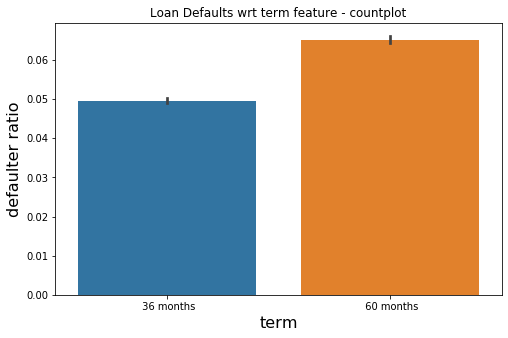

In [9]:
plotUnivariateBar("term", figsize=(8,5))

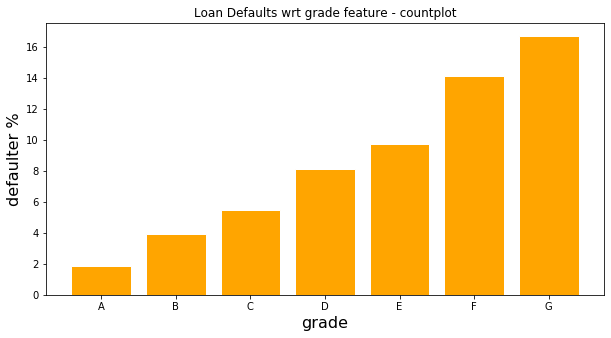

In [10]:
plotUnivariateRatioBar("grade")

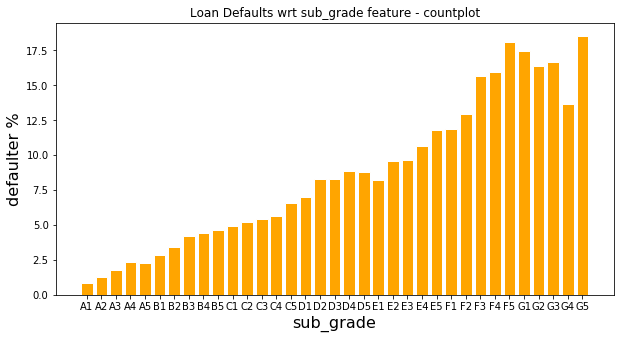

In [11]:
plotUnivariateRatioBar("sub_grade")

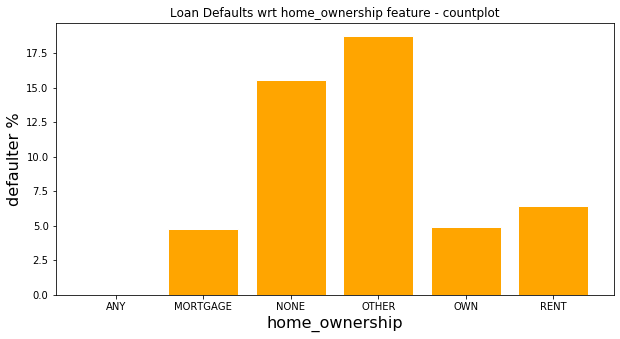

In [12]:
plotUnivariateRatioBar("home_ownership")

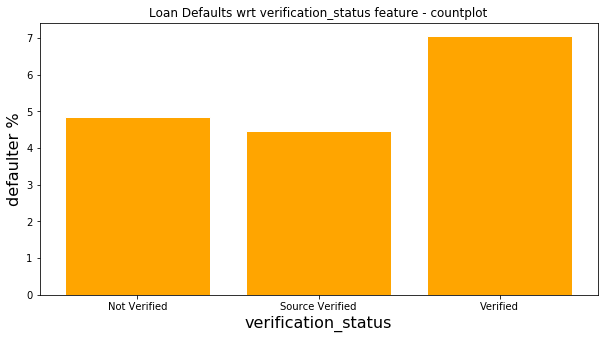

In [13]:
plotUnivariateRatioBar("verification_status")

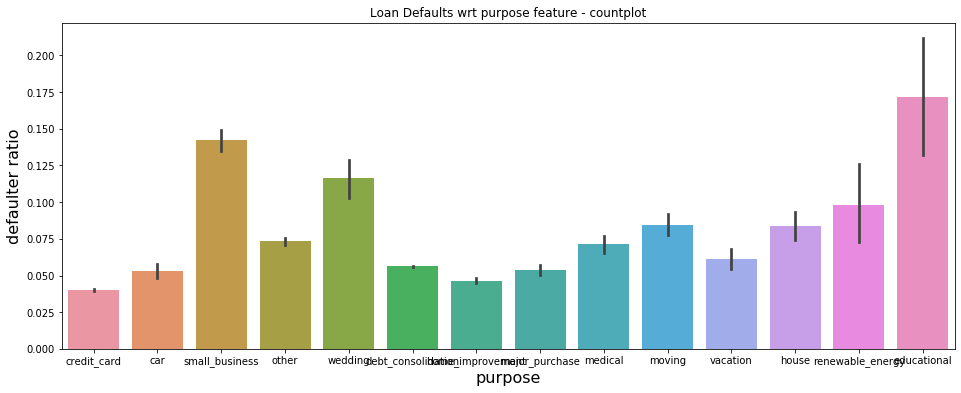

In [14]:
plotUnivariateBar("purpose", figsize=(16,6))

### B. Continuous Features

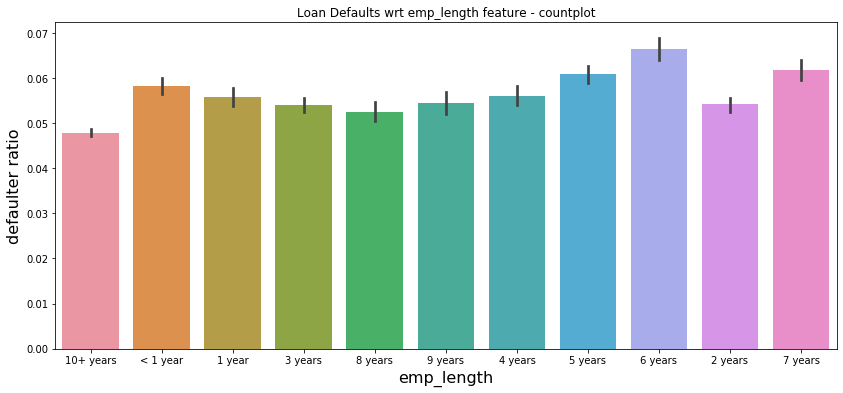

In [15]:
plotUnivariateBar("emp_length", figsize=(14,6))

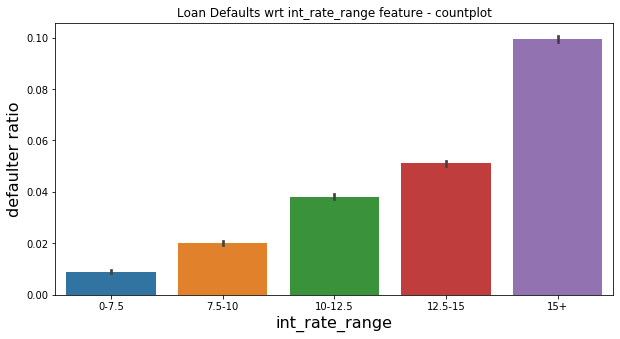

In [16]:
plotUnivariateBar("int_rate_range")

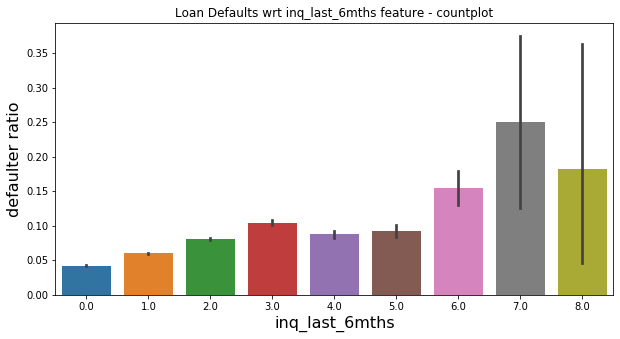

In [17]:
plotUnivariateBar("inq_last_6mths")

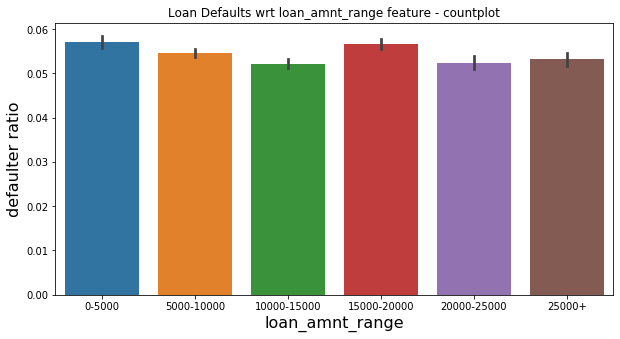

In [19]:
plotUnivariateBar("loan_amnt_range")

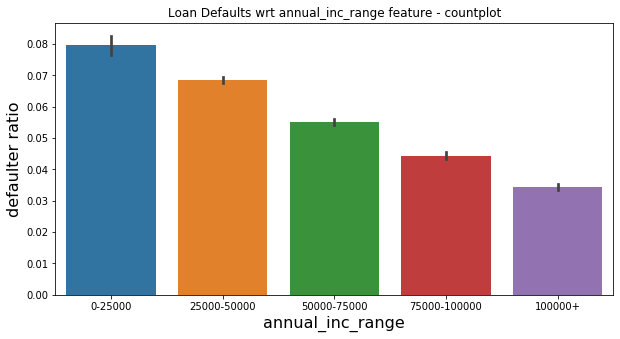

In [21]:
plotUnivariateBar("annual_inc_range")

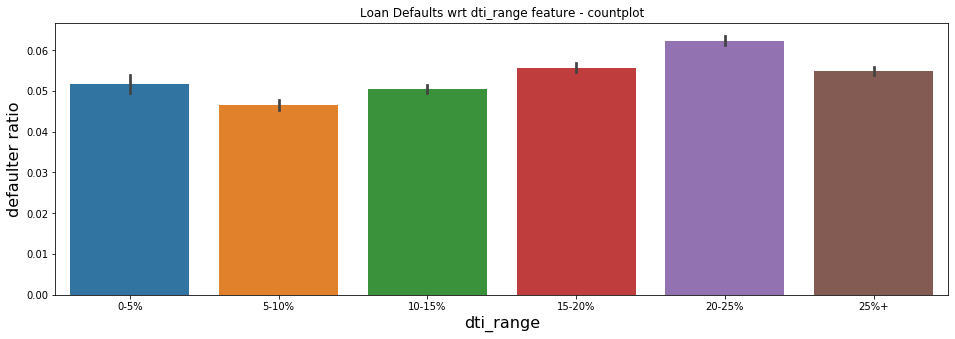

In [22]:
plotUnivariateBar("dti_range", figsize=(16,5))

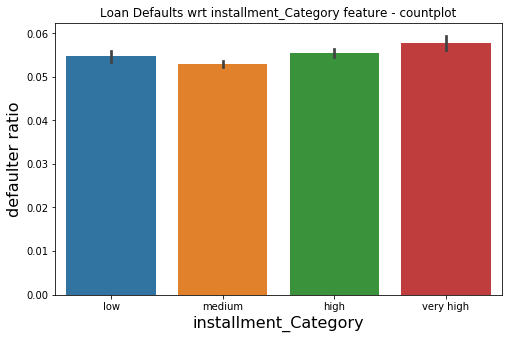

In [23]:
plotUnivariateBar("installment_Category", figsize=(8,5))

In [25]:
original_data.columns,original_data.shape

(Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
        'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
        'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
        'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
        'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
        'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
        'collections_12_mths_ex_med', 'mths_since_last_major_derog',
        'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
        'verification_status_joint', 'acc_now_del

In [8]:
original_data.drop(columns=['loan_amnt_range','int_rate_range','annual_inc_range','installment_Category','dti_range'],
                            inplace=True)

### Data Pre-Processing and Data Wrangling

In [6]:
""" Out of the available categorical variables, there are 2 such variables where the classes have no hierarchy;
nor the hierarchy can be manually created. The variable is :
1.PURPOSE
2.Title
This variable can be transformed into numeric data before splitting the dataset."""

col=['purpose','title']

def label_encoder(data):
    
    # to convert a list to index form using pd.Index()
    obj = pd.Index(col)
    print (obj)    
    
    lenc = LabelEncoder()

    for feat in obj:
        data[feat] = lenc.fit_transform(data[feat].astype(str))

label_encoder(original_data)


Index(['purpose', 'title'], dtype='object')


In [7]:
original_data.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2       NaN  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   
2     15.96        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status   issue_d pymnt_plan  \
0     24000.0            Verified  Dec-2011          n   
1     30000.0     Source Verified  Dec-2011          n   
2     12252.0        Not Verified  Dec-2011          n   

                                                desc  purpose  title zip_code  \
0    Borrower added on 12/22/11 > I need to upgra...        1   8573    860xx   
1    Borrower added on 12/22/11 > I plan to use t...        0  48115    309xx   
2                                                NaN       11  58621    606xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         AZ  27.65          0.0         Jan-1985             1.0   
1         GA   1.00          0.0         Apr-1999             5.0   
2         IL   8.72          0.0         Nov-2001             2.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0    13648.0        83.7        9.0                   f        0.0   
1     1687.0         9.4        4.0                   f        0.0   
2     2956.0        98.5       10.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78          5000.00   
1            0.0  1008.710000          1008.71           456.46   
2            0.0  3003.653644          3003.65          2400.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   
2         603.65                 0.0        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Jan-2015           171.62          NaN           Jan-2016   
1     Apr-2013           119.66          NaN           Sep-2013   
2     Jun-2014           649.91          NaN           Jan-2016   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN          1.0   
1                         0.0                          NaN          1.0   
2                         0.0                          NaN          1.0   

  application_type  annual_inc_joint  dti_joint verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                       NaN   
1       INDIVIDUAL               NaN        NaN                       NaN   
2       INDIVIDUAL               NaN        NaN                       NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   
1             0.0           NaN          NaN          NaN         NaN   
2             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN 

In [8]:
original_data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

#### Dropping Irrelevant Columns

In [9]:
original_data.shape

(855969, 73)

In [10]:
col_to_drop = ["all_util","addr_state","application_type","acc_now_delinq","annual_inc_joint",
                "desc","dti_joint",
               "emp_title",
               "funded_amnt_inv",
               "id","il_util","inq_fi","inq_last_12m",
               "loan_amnt","last_credit_pull_d",
               "max_bal_bc","member_id","mths_since_last_record","mths_since_rcnt_il",               
               "open_acc_6m","open_il_12m","open_il_24m","open_il_6m","open_rv_12m","open_rv_24m","out_prncp_inv",
               "policy_code","pymnt_plan","pub_rec",
               "total_bal_il","total_cu_tl","total_pymnt_inv",               
               "verification_status",
              "verification_status_joint"]

In [11]:
original_data.drop(columns=col_to_drop,inplace=True)

In [12]:
original_data.shape

(855969, 39)

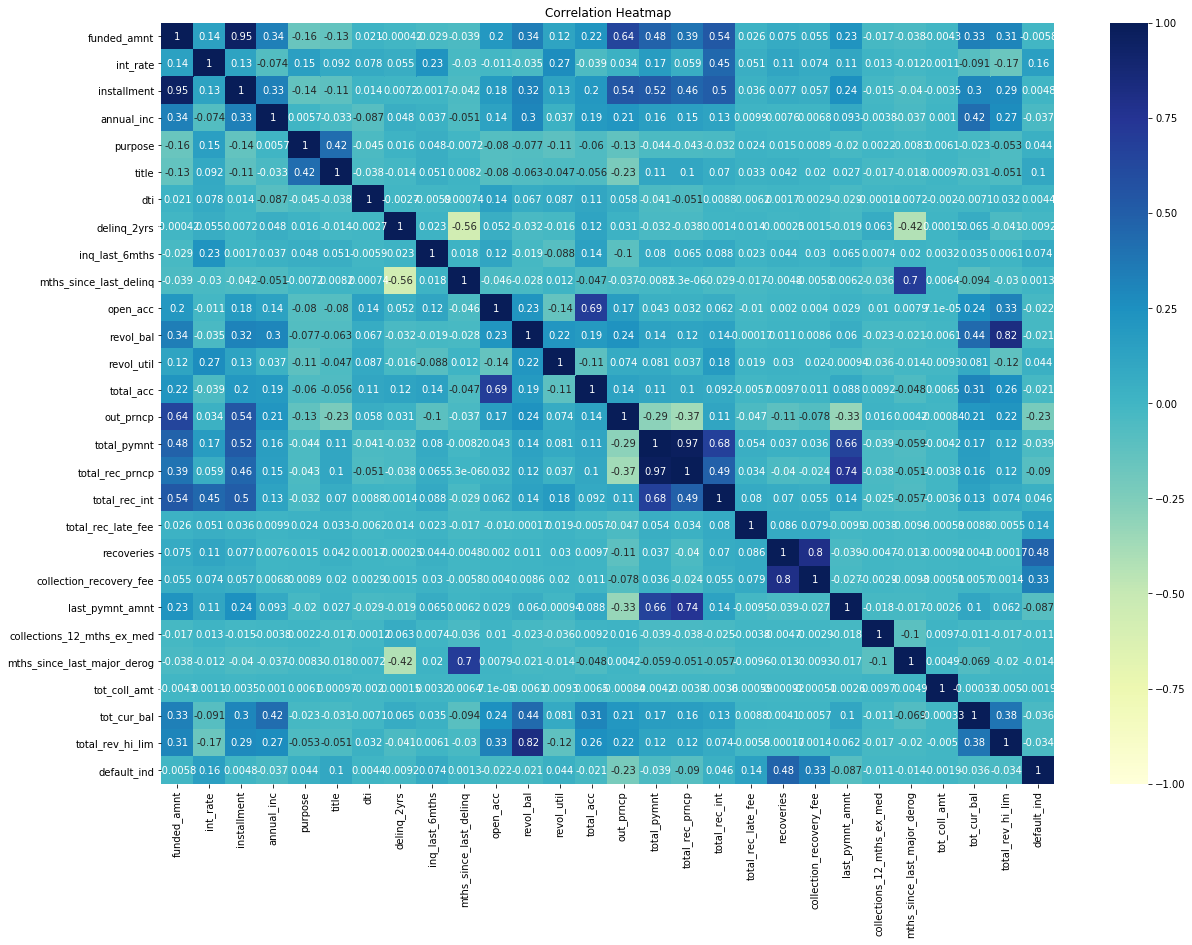

In [13]:
#heat map for identifying multi-colinearit

corr_tab=original_data.corr()
fit,ax = plt.subplots(figsize=(20,14))
sns.heatmap(corr_tab,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
ax.set_ylim(len(corr_tab), 0.0)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
original_data.shape

(855969, 39)

In [15]:
describe_original_data = original_data.describe(include='all').transpose()
describe_original_data["Null_Val"] = original_data.isnull().sum()
describe_original_data["Data_Type"] = original_data.dtypes
describe_original_data.sort_index().sort_values(by=["Data_Type"])

count unique         top    freq       mean  \
purpose                      855969    NaN         NaN     NaN    2.56231   
title                        855969    NaN         NaN     NaN    19606.3   
default_ind                  855969    NaN         NaN     NaN  0.0542858   
annual_inc                   855969    NaN         NaN     NaN    75071.2   
open_acc                     855969    NaN         NaN     NaN    11.5424   
out_prncp                    855969    NaN         NaN     NaN    8284.83   
recoveries                   855969    NaN         NaN     NaN    47.0895   
revol_bal                    855969    NaN         NaN     NaN    16910.5   
revol_util                   855523    NaN         NaN     NaN    55.0194   
tot_coll_amt                 788656    NaN         NaN     NaN    225.413   
tot_cur_bal                  788656    NaN         NaN     NaN     139766   
total_acc                    855969    NaN         NaN     NaN    25.2693   
total_pymnt                  855969    NaN         NaN     NaN     7653.3   
total_rec_int                855969    NaN         NaN     NaN    1755.05   
total_rec_late_fee           855969    NaN         NaN     NaN    0.31953   
total_rec_prncp              855969    NaN         NaN     NaN    5850.84   
total_rev_hi_lim             788656    NaN         NaN     NaN    32163.6   
mths_since_last_delinq       416157    NaN         NaN     NaN    34.1499   
mths_since_last_major_derog  213139    NaN         NaN     NaN    44.1015   
last_pymnt_amnt              855969    NaN         NaN     NaN    2225.99   
collection_recovery_fee      855969    NaN         NaN     NaN    4.95123   
collections_12_mths_ex_med   855913    NaN         NaN     NaN  0.0142304   
int_rate                     855969    NaN         NaN     NaN    13.1923   
installment                  855969    NaN         NaN     NaN    436.238   
inq_last_6mths               855969    NaN         NaN     NaN   0.680915   
delinq_2yrs                  855969    NaN         NaN     NaN   0.311621   
dti                          855969    NaN         NaN     NaN    18.1222   
funded_amnt                  855969    NaN         NaN     NaN    14732.4   
earliest_cr_line             855969    697    Aug-2001    6433        NaN   
emp_length                   812908     11   10+ years  282090        NaN   
term                         855969      2   36 months  600221        NaN   
last_pymnt_d                 847107     97    Jan-2016  467510        NaN   
sub_grade                    855969     35          B3   54958        NaN   
home_ownership               855969      6    MORTGAGE  429106        NaN   
initial_list_status          855969      2           f  442555        NaN   
issue_d                      855969    103    Oct-2015   48212        NaN   
next_pymnt_d                 602998      3    Feb-2016  534094        NaN   
grade                        855969      7           B  247998        NaN   
zip_code                     855969    931       945xx    9466        NaN   

                                  std    min      25%      50%      75%  \
purpose                       2.27134      0        2        2        2   
title                         10871.5      0    12682    16116    16116   
default_ind                  0.226581      0        0        0        0   
annual_inc                    64264.5      0    45000    65000    90000   
open_acc                      5.30809      0        8       11       14   
out_prncp                     8461.95      0        0  6290.25  13528.8   
recoveries                    413.136      0        0        0        0   
revol_bal                     22223.7      0     6469    11903    20857   
revol_util                    23.8116      0     37.6     55.9     73.5   
tot_coll_amt                  10489.4      0        0        0        0   
tot_cur_bal                    153939      0    29870  81008.5   208703   
total_acc                     11.8188      2     

### Null Values Treatment and Transforming Object Data To Numeric

##### 1. Last Payment Date

In [16]:
# change to date time format

original_data['last_pymnt_d']=pd.to_datetime(original_data['last_pymnt_d'],infer_datetime_format=True)
original_data['next_pymnt_d']=pd.to_datetime(original_data['next_pymnt_d'],infer_datetime_format=True)

due_time = original_data['next_pymnt_d'] - original_data['last_pymnt_d']
original_data['due_time'] = due_time.dt.days 

In [17]:
original_data['last_pymnt_d'].dtypes

dtype('<M8[ns]')

In [18]:
original_data.drop(columns=['next_pymnt_d','last_pymnt_d'],inplace=True)

In [19]:
original_data.due_time.isnull().sum()

261306

In [20]:
original_data.due_time.replace(np.nan,0,inplace=True)

##### 2. revol_util

In [21]:
original_data['revol_util'].replace(np.nan,0,inplace=True)

In [22]:
original_data['revol_util'].isnull().sum()

0

##### 3.tot_cur_bal

In [23]:
original_data['tot_cur_bal'].replace(np.nan,0,inplace=True)

In [24]:
original_data.tot_cur_bal.isnull().sum()

0

##### 4.total_rev_hi_lim

In [25]:
original_data['total_rev_hi_lim'].replace(np.nan,0,inplace=True)

In [26]:
original_data['total_rev_hi_lim'].isnull().sum()

0

In [27]:
original_data['mths_since_last_major_derog'].replace(np.nan,0,inplace=True)

In [28]:
original_data['collections_12_mths_ex_med'].replace(np.nan,0,inplace=True)

In [29]:
original_data['mths_since_last_delinq'].replace(np.nan,0,inplace=True)

In [30]:
original_data['last_pymnt_amnt'].isnull().sum()

0

In [31]:
original_data['tot_coll_amt'].replace(np.nan,0,inplace=True)

In [32]:
original_data.isnull().sum()

funded_amnt                        0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     43061
home_ownership                     0
annual_inc                         0
issue_d                            0
purpose                            0
title                              0
zip_code                           0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq             0
open_acc                           0
revol_bal                          0
revol_util                         0
total_acc                          0
initial_list_status                0
out_prncp                          0
total_pymnt                        0
total_rec_prncp                    0
total_rec_int                      0
t

In [33]:
# Dealing with NA values in employee length and Changing employee length to numerical 

original_data['emp_length'].fillna("< 1 year",inplace= True)

dict_emp_length = {'10+ years':10, '6 years':6, '4 years':4, '< 1 year':0,
                   '2 years':2,'9 years':9, '5 years':5, '3 years':3, '7 years':7, '1 year':1,'8 years':8}
original_data['emp_length'].replace(dict_emp_length, inplace=True)

original_data.emp_length.isnull().sum()

0

In [34]:
#generate data copy 

data=original_data.copy()

In [35]:
# converting 'issue_d' and 'earliest_cr_line' to datetime format

data['issue_d'] = pd.to_datetime(data['issue_d'],infer_datetime_format=True)
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'],infer_datetime_format=True)

#create new var for "credit history"

credit_hist = data['issue_d'] - data['earliest_cr_line']
data['credit_hist'] = credit_hist.dt.days   

In [36]:
 # credit_line_ratio 
    
data['credit_line_ratio']=data['open_acc']/data['total_acc']

##### Create Dummy Variables for home_ownership and initial_list_status columns, since they are nominal in nature

In [38]:
#create dummies for the varibales that are nominal in nature

dummy1=pd.get_dummies(data["home_ownership"],drop_first=True,prefix="home_ownership")
dummy2=pd.get_dummies(data["initial_list_status"],drop_first=True,prefix="initial_list_status")

data= pd.concat([data,dummy1],axis=1)
data= pd.concat([data,dummy2],axis=1)


In [39]:
term_to_int = {' 36 months': 1,
                   ' 60 months': 2}
  #term of loan
grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
   #grade of loan application form

    #copied from above, we can write a function to generate this dict
sub_grade_sorted = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34} 

    #in place replacements
data.replace({'term': term_to_int, 'grade':grade_to_int,'sub_grade': sub_grade_sorted}, inplace=True)

In [40]:
data.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'issue_d', 'purpose',
       'title', 'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind',
       'due_time', 'credit_hist', 'credit_line_ratio',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'initial_list_status_w'],
      dtype='object')

In [41]:
data.drop(columns=['earliest_cr_line','installment','open_acc','total_acc',
                  'zip_code'],inplace=True)

In [42]:
describe_data = data.describe(include='all').transpose()
describe_data["Null_Val"] = data.isnull().sum()
describe_data["Data_Type"] = data.dtypes
describe_data.sort_index().sort_values(by=["Data_Type"])

C:\Users\ABHAYA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count unique                  top    freq  \
home_ownership_OWN           855969    NaN                  NaN     NaN   
home_ownership_NONE          855969    NaN                  NaN     NaN   
home_ownership_MORTGAGE      855969    NaN                  NaN     NaN   
home_ownership_RENT          855969    NaN                  NaN     NaN   
home_ownership_OTHER         855969    NaN                  NaN     NaN   
initial_list_status_w        855969    NaN                  NaN     NaN   
title                        855969    NaN                  NaN     NaN   
purpose                      855969    NaN                  NaN     NaN   
emp_length                   855969    NaN                  NaN     NaN   
term                         855969    NaN                  NaN     NaN   
grade                        855969    NaN                  NaN     NaN   
credit_hist                  855969    NaN                  NaN     NaN   
default_ind                  855969    NaN                  NaN     NaN   
sub_grade                    855969    NaN                  NaN     NaN   
revol_util                   855969    NaN                  NaN     NaN   
revol_bal                    855969    NaN                  NaN     NaN   
recoveries                   855969    NaN                  NaN     NaN   
annual_inc                   855969    NaN                  NaN     NaN   
tot_coll_amt                 855969    NaN                  NaN     NaN   
tot_cur_bal                  855969    NaN                  NaN     NaN   
total_pymnt                  855969    NaN                  NaN     NaN   
total_rec_int                855969    NaN                  NaN     NaN   
total_rec_late_fee           855969    NaN                  NaN     NaN   
out_prncp                    855969    NaN                  NaN     NaN   
mths_since_last_major_derog  855969    NaN                  NaN     NaN   
inq_last_6mths               855969    NaN                  NaN     NaN   
last_pymnt_amnt              855969    NaN                  NaN     NaN   
issue_d                      855969    103  2015-10-01 00:00:00   48212   
int_rate                     855969    NaN                  NaN     NaN   
total_rec_prncp              855969    NaN                  NaN     NaN   
funded_amnt                  855969    NaN                  NaN     NaN   
due_time                     855969    NaN                  NaN     NaN   
dti                          855969    NaN                  NaN     NaN   
delinq_2yrs                  855969    NaN                  NaN     NaN   
credit_line_ratio            855969    NaN                  NaN     NaN   
collections_12_mths_ex_med   855969    NaN                  NaN     NaN   
collection_recovery_fee      855969    NaN                  NaN     NaN   
mths_since_last_delinq       855969    NaN                  NaN     NaN   
total_rev_hi_lim             855969    NaN                  NaN     NaN   
initial_list_status          855969      2                    f  442555   
home_ownership               855969      6             MORTGAGE  429106   

                                 first       last        mean         std  \
home_ownership_OWN                 NaT        NaT   0.0982933    0.297711   
home_ownership_NONE                NaT        NaT  5.2572e-05  0.00725047   
home_ownership_MORTGAGE            NaT        NaT     0.50131    0.499999   
home_ownership_RENT                NaT        NaT    0.400172    0.489933   
home_ownership_OTHER               NaT        NaT  0.00016823   0.0129693   
initial_list_status_w              NaT        NaT    0.482978     0.49971   
title                              NaT        NaT     19606.3     10871.5   
purpose                            NaT        NaT     2.56231     2.27134   
emp_length                         NaT        NaT     5.71652     3.80496   
term                               NaT        NaT     1.29878    0.457724   
grade                           

## Splitting the data into Train and Test data

In [47]:
"""Splitting the data into train and test is extremely crucial before we enter into data pre-processing stage.
It is so because, doing the splitting now will eleminate the risk of data leakage.
Data leakage can cause the prediction model to generate results that would be 'too good to be true'.
To avoid the risk and later consequences of data leakage, splitting has to be performed before we start 
working on the data """

# Splitting the data into trian and test based on datetime

#individual_group['issue_d']=pd.to_datetime(individual_group['issue_d'],infer_datetime_format=True)

split_date=pd.datetime(2015,5,1)

train_data=data.loc[data['issue_d']<=split_date]
test_data=data.loc[data['issue_d']>split_date]

print(train_data.shape)
print(test_data.shape)

C:\Users\ABHAYA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


(598978, 41)
(256991, 41)


In [48]:
train_data.drop(columns="issue_d",inplace=True)
test_data.drop(columns="issue_d",inplace=True)

In [49]:
#save as
train_data.to_csv('train_data_custom_0101.csv')
test_data.to_csv('test_data_custom_0101.csv')

In [50]:
train_data.shape,test_data.shape

((598978, 40), (256991, 40))